In [1]:
# Anselmus Pavel Adriska - 2301851414
# UAS CV No 2B

import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
channel = [0]
histSize = [256]
histRange = [0,256]

test_img_path = '../input/indonesian-batik-motifs/batik-keraton/1.jpg'
test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (300, 300), interpolation=cv2.INTER_AREA)
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_hist = cv2.calcHist([test_img_gray],channel,None,histSize,histRange)
cv2.normalize(test_hist, test_hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

other_hist = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        try:
            img_path = os.path.join(dirname, filename)
            img_path = img_path.replace('/kaggle','..')
            img = cv2.imread(img_path)
            img = cv2.resize(img, (300, 300), interpolation=cv2.INTER_AREA)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            hist = cv2.calcHist([img_gray],channel,None,histSize,histRange)
            cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
            other_hist.append([img, hist])
        except:
            continue

In [3]:
result = []

for item in other_hist:
    dist = cv2.compareHist(test_hist, item[1], 0)
    result.append([dist, item])

In [4]:
for j in range(0, len(result)):
    for i in range(0, len(result)-1):
        if result[i][0] < result[i+1][0]:
            tmp = result[i+1]
            result[i+1] = result[i]
            result[i] = tmp

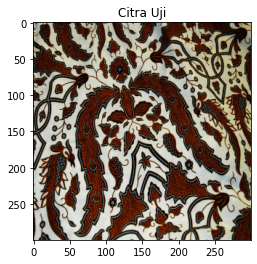

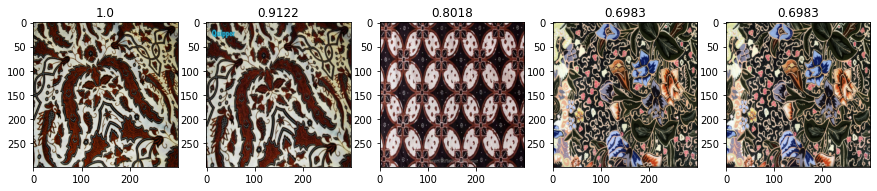

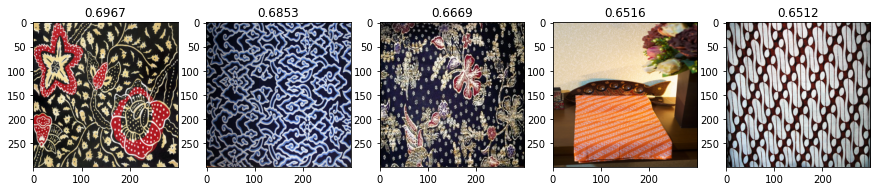

In [5]:
fig = plt.figure()
fig.add_subplot(1,1,1)
plt.imshow(cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB))
plt.title("Citra Uji")
plt.show()

y=0
for x in range(1,3):
    fig = plt.figure(figsize=(15,15))
    for i in range(0,5):
        plt.subplot(x,5,i+1)
        plt.imshow(cv2.cvtColor(result[y][1][0],cv2.COLOR_BGR2RGB))
        plt.title(round(result[y][0],4))
        y+=1
    plt.show()